# Google Stock Price Prediction Using LSTM

## 1. Import the Libraries.

In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Load the Training Dataset.

In [44]:
df_train=pd.read_csv('Google_train_data.csv')

In [45]:
df_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


## 3. Use the Open Stock Price Column to Train Your Model.

In [46]:
df_set=df_train.iloc[:,1:2].values
print(df_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [47]:
print(df_set.shape)

(1258, 1)


## 4. Normalizing the Dataset.

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaled_df_set=scaler.fit_transform(df_set)
scaled_df_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

## 5. Creating X_train and y_train Data Structures.

In [49]:
x_train=[]
y_train=[]
for i in range(60,1258):
    x_train.append(scaled_df_set[i-60:i,0])
    y_train.append(scaled_df_set[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)

In [50]:
print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


## 6. Reshape the Data.

In [51]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape
                   

(1198, 60, 1)

## 7. Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM.

In [52]:
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [53]:
regressor=Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

## 8. Fitting the Model.

In [54]:
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 13s 68ms/step - loss: 0.0340
Epoch 2/100
38/38 [==============================] - 3s 72ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0065
Epoch 4/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0052
Epoch 5/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0060
Epoch 8/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0055
Epoch 9/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0048
Epoch 10/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0038
Epoch 12/100
38/38 [==============================] - 3s 69ms/step - loss: 0.0036
Epoch 13/100
38/38 [====

## 9. Extracting the Actual Stock Prices of Jan-2017.

In [55]:
df_test=pd.read_csv("Google_test_data.csv")
actual_stock_price=df_test.iloc[:,1:2].values

## 10. Preparing the Input for the Model.

In [56]:
df_total=pd.concat((df_train['Open'],df_test['Open']),axis=0)
inputs=df_total[len(df_total)-len(df_test)-60:].values

inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

x_test=[]
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

## 11. Predicting the Values for Jan 2017 Stock Prices.

In [57]:
pred_stock_price=regressor.predict(x_test)
pred_stock_price=scaler.inverse_transform(pred_stock_price)

1/1 [==============================] - 2s 2s/step


## 12. Plotting the Actual and Predicted Prices for Google Stocks.

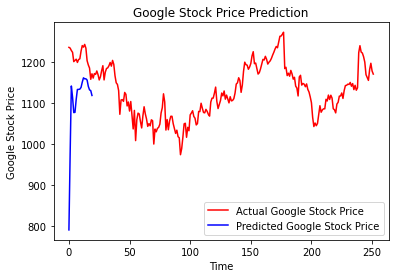

In [58]:
plt.plot(actual_stock_price,color='red',label='Actual Google Stock Price')
plt.plot(pred_stock_price, color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()